# Sleep EEG slow waves detection

## Intoductory notes:
This notebook presents slow waves detection functionality.

Recommended readings:
1. [YASA: FAQ](https://raphaelvallat.com/yasa/build/html/faq.html#event-detection)
4. [YASA: Slow-waves detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/05_sw_detection.ipynb)
5. [YASA: Multi-channel slow-wave detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/06_sw_detection_multi.ipynb)
6. [YASA: SWResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.SWResults.html#yasa-swresults)
4. [MNE: Time-frequency analysis: power and inter-trial coherence](https://mne.tools/stable/auto_tutorials/time-freq/20_sensors_time_frequency.html#time-frequency-analysis-power-and-inter-trial-coherence)
5. [MNE: AverageTFR class](https://mne.tools/stable/generated/mne.time_frequency.AverageTFR.html#mne-time-frequency-averagetfr)

## Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
%matplotlib widget
from sleepeeg.pipeline import SlowWavesPipe

## Spindles detection

In [2]:
slow_waves_pipe = SlowWavesPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


03-May-23 14:40:02 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.sw_detect.html) for details about the arguments.

In [3]:
slow_waves_pipe.detect(
    picks="eeg",
    include=(0, 1, 2, 3, 4),
    freq_sw=(0.3, 1.5),
    dur_neg=(0.3, 1.5),
    dur_pos=(0.1, 1),
    amp_neg=(40, 200),
    amp_pos=(10, 150),
    amp_ptp=(75, 350),
    coupling=False,
    coupling_params={"freq_sp": (12, 16), "p": 0.05, "time": 1},
    remove_outliers=False,
    save=True,
)

Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed:   11.3s finished


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.SWResults.html) for details about the arguments.

In [4]:
slow_waves_pipe.results.summary(
    grp_chan=False, 
    grp_stage=True, 
    mask=None, 
    aggfunc='mean', 
    sort=True
)

Count      Density  Duration  ValNegPeak  ValPosPeak         PTP  \
Stage                                                                     
0       2338   132.453082  1.484115  -80.979296   54.150413  135.129709   
1       1292   198.769231  1.210765  -74.731964   48.105816  122.837781   
2       7778   118.748092  1.231468  -70.059891   43.555949  113.615840   
3      78632  1894.746988  1.230909  -63.615579   50.000042  113.615622   
4        324    18.514286  1.520407  -72.216701   48.068223  120.284924   

            Slope  Frequency  
Stage                         
0      403.303421   0.740573  
1      445.367416   0.885849  
2      408.338839   0.861258  
3      409.404133   0.856935  
4      331.656728   0.722056

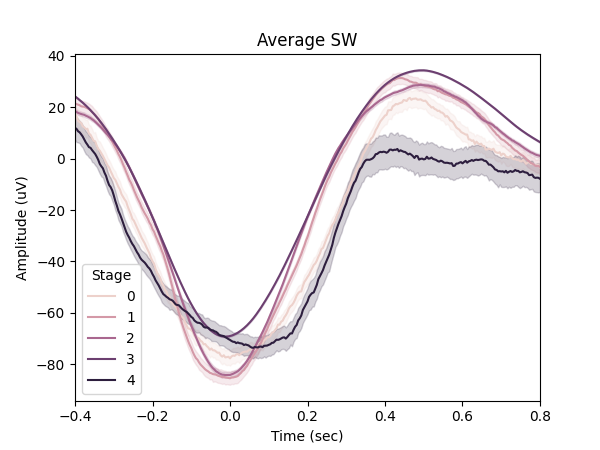

In [5]:
slow_waves_pipe.plot_average(
    save=True, 
    # Arguments passed to the YASA's plot_average()
    yasa_args=dict(
        center="NegPeak",
        hue="Stage",
        time_before=0.4,
        time_after=0.8,
        filt=(None,None),
        mask=None,
    )
)

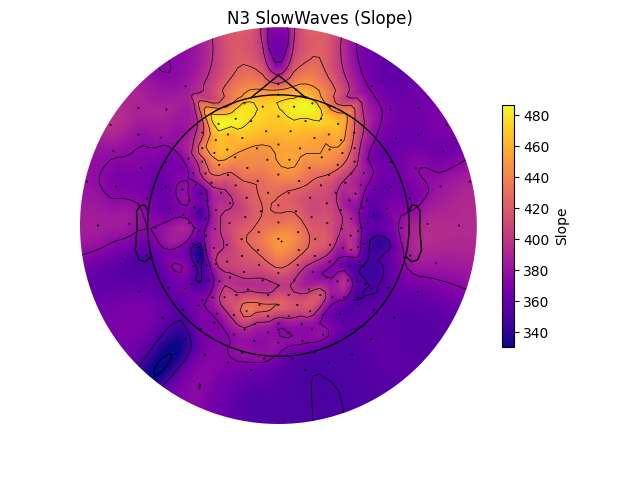

In [6]:
slow_waves_pipe.plot_topomap(
    prop='Slope',  #  Any of the event properties returned by pipe.results.summary().
    stage='N3',  # Stage to plot the topomap for.
    aggfunc='mean',  # Aggregation function for channel grouping.
    # Should contain at least index of the provided "stage".
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},  
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    subplots_args=None,  # Arguments passed to the plt.subplots(). Have no effect if axis is provided.
)

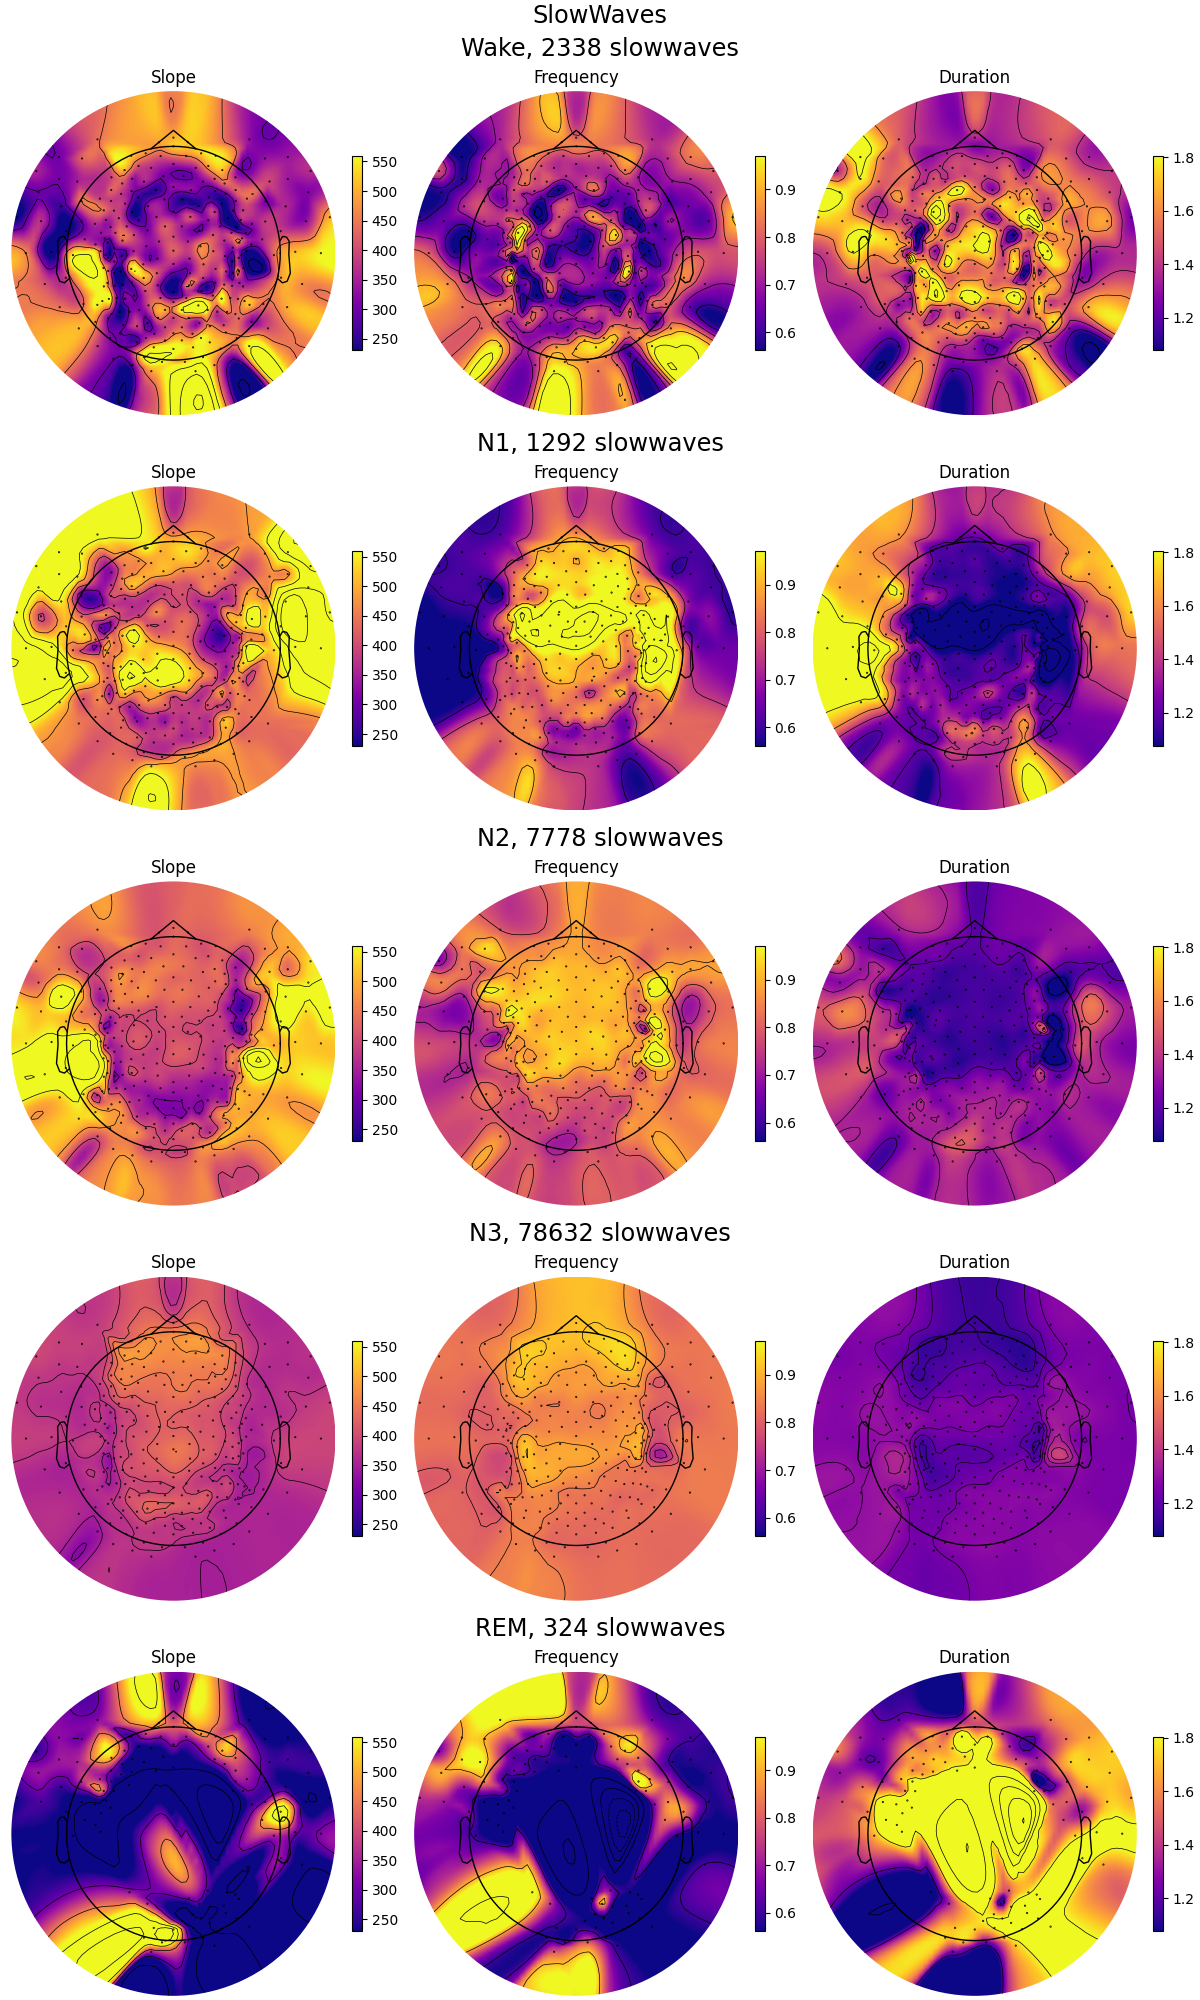

In [7]:
slow_waves_pipe.plot_topomap_collage(
    # Some of the event properties returned by pipe.results.summary().
    props=['Slope', 'Frequency', 'Duration'], 
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all",
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    low_percentile=5,  # Set min color value by percentile of the property data.
    high_percentile=95,  # Set max color value by percentile of the property data.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    figure_args=None,  # Arguments passed to the plt.figure().
)

Constructs MNE [AverageTFR](https://mne.tools/stable/generated/mne.time_frequency.AverageTFR.html) object for every available sleep stage.

In [8]:
slow_waves_pipe.apply_tfr(
    freqs=(0.5,5),  # Interval of frequencies of interest.
    n_freqs=100,  # TFR frequency resolution.
    time_before=4,  # Time in sec before the peak to use in TFR computation. Should be positive.
    time_after=4,  # Time in sec after the peak to use in TFR computation.
    method='morlet',  # TFR method: 'morlet' or 'multitaper'.
    # Arguments passed to mne.time_frequency.tfr_array_morlet() or mne.time_frequency.tfr_array_multitaper()
    tfr_method_args=dict(
        n_cycles=2,
    ),  
    save=True  # Whether to save AverageTFR object per sleep stage as hdf5 file.
)

slow_waves_pipe.tfrs

100%|██████████| 252/252 [00:13<00:00, 18.85it/s]


{'N3': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 305, channels : 257, ~392.7 MB>,
 'Wake': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 9, channels : 257, ~392.7 MB>,
 'REM': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 3, channels : 106, ~162.0 MB>,
 'N2': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 30, channels : 256, ~391.2 MB>,
 'N1': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 5, channels : 252, ~385.0 MB>}

No baseline correction applied


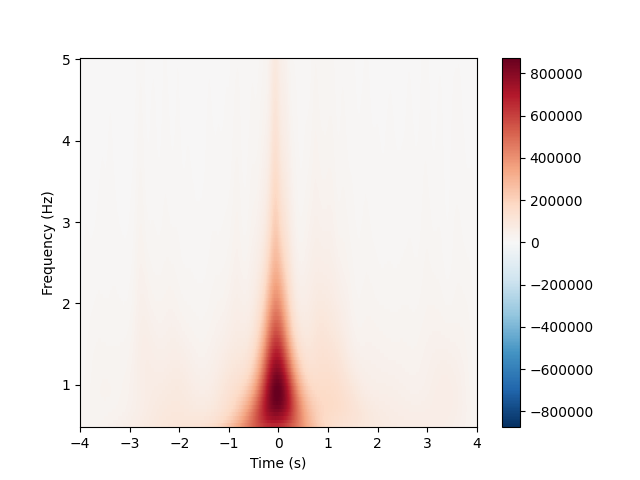

No baseline correction applied


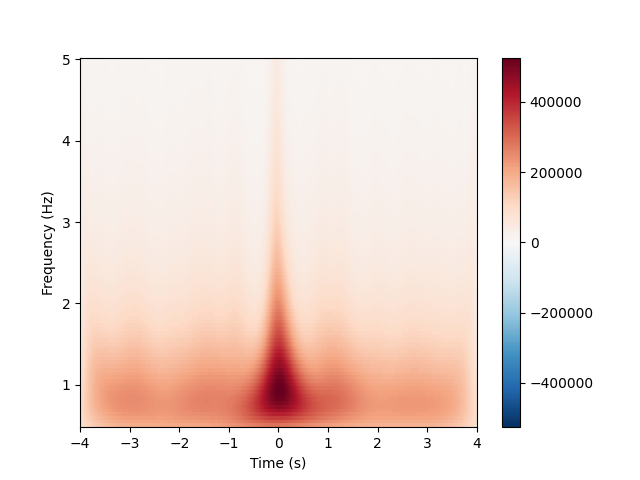

[<Figure size 640x480 with 2 Axes>]

In [9]:
slow_waves_pipe.tfrs['N2'].plot(['E101']), 
slow_waves_pipe.tfrs['N3'].plot(['E101'])

If you want to load saved TFR files:

In [10]:
slow_waves_pipe.read_tfrs(dirpath=None)

Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SlowWavesPipe\slowwaves_N1-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SlowWavesPipe\slowwaves_N2-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SlowWavesPipe\slowwaves_N3-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SlowWavesPipe\slowwaves_REM-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\processing\SlowWavesPipe\slowwaves_Wake-tfr.h5 ...
